# Burchardt et al (2021) <br />**Three fish species**

- **Paper:** Burchardt, L. S., Picciulin, M., Parmentier, E., & Bolgan, M. (2021). A primer on rhythm quantification for fish sounds: A Mediterranean case study. Royal Society Open Science, 8(9), 210494. https://doi.org/10.1098/rsos.210494
- **Dataset:**  Burchardt, L.; Picciulin, M.; Parmentier, E.; Bolgan, M. (2021). Rhythmic properties of three soundtypes of mediterranean vocal fish. [Dataset]. Data Publisher: Museum für Naturkunde Berlin (MfN) - Leibniz Institute for Evolution and Biodiversity Science. https://doi.org/10.7479/6qfa-9956.
- **Dataset licence:** CC-BY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.intervals import report_intervals, save_intervals, load_intervals, drop_na
from src.motifs import ngram_motifs, normalize, separate_sequences
from src.plotting import rhythm_plot, show_integer_ratios, ternary_motif_plot, defaults

## Background

*N.B.: Copied from the documentation*

The dataset comprisses the raw data of the project "A primer on rhythm quantification for fish sounds: a Mediterranean case study".

Three soundtypes of common vocal fish of the mediterranean were recorded via 
passive acoustic monitoring (PAM) and the sequences checked for rhytmicality 
with rhythm analysis. We have sequences for the following three sounds: 
R-pattern calls of Sciaena umbra (the brown meagre), /Kwa/ calls emitted by 
Scorpaena spp. and calls of Ophidon rochei males.

Time stamps of the analysed sound sequences are given, namely the start and 
the end of sounds, the correpsonding sequence and filename. Furthermore the 
analysed parameters are reported: IOIs (Inter-Onset-Intervals, Interval 
between start of one sound element and the next sound element), Coefficient of
variation, normalized pairwise Variability index, exact beat frequency in Hz 
for IOI analysis and Fourier analysis. One sequence is uttered by one 
individual. Individual ID is unknown.


### Fields

- `start`		start of a sound in the recording in seconds
- `end`		end of a sound in the recording in seconds
- `ioi`		Inter-Onset-Interval in seconds, interval between start of one sound element and the next sound element
- `seq_code`	internal reference to id a single sequence, one sequence is uttered by the same individual (determined via same signal-to-noise ratio in the recording)
- `cv`		Coeffiecient of variation, variability parameter, the population mean in relation to the standard deviation 
- `npvi`		normlaized pairwise variability index, variability parameter, see for example: https://doi.org/10.1093/jole/lzx002 OR https://doi.org/10.1371/journal.pcbi.1007755
- ` ioi_beat`	beat frequency calculated with IOIs in Hertz, see https://doi.org/10.1093/jole/lzx002 OR https://doi.org/10.1371/journal.pcbi.1007755
- `fourier_beat` 	beat frequency calculated with Fourier analysis in Hertz, see https://doi.org/10.1093/jole/lzx002 OR https://doi.org/10.1371/journal.pcbi.1007755
	
### Sequence codes
	
- `BM1`		brown meagre sequence 1 (brown meagre = Sciaena umbra)
- `KWA1`		Kwa sequence 1, recorded in Mallorca
- `KWA5-C`		Kwa sequence 5, recorded in Crete
- `OR2-10min`	Ophidion rochei sequence 2, 10 minute recording (recordings for the other sound types were 1 minute long)


### More information on data recording:
	
- Sciaena umbra:	https://doi.org/10.1080/09524622.2012.727277 and https://doi.org/10.1002/aqc.3340
- Ophidion rochei: https://doi.org/10.1002/aqc.2973
- Kwa: not yet published (March, 2021, see object description for updates)

## Preprocessing

In [2]:
def drop_empty_rows(df):
    empty_rows = df[df.isna().all(axis=1)].index
    return df.drop(index=empty_rows)

In [6]:
kwa_df = drop_empty_rows(pd.read_csv('data/burchardt2021/Kwa.csv'))
kwa_intervals = separate_sequences(kwa_df, column='seq_code')['ioi'].values

In [7]:
bm_df = drop_empty_rows(pd.read_csv('data/burchardt2021/SciaenaUmbra.csv'))
bm_intervals = separate_sequences(bm_df, column='seq_code')['ioi'].values

In [8]:
or_df = drop_empty_rows(pd.read_csv('data/burchardt2021/OphidionRochei.csv'))
or_intervals = separate_sequences(or_df, column='seq_code')['ioi'].values

## Plot

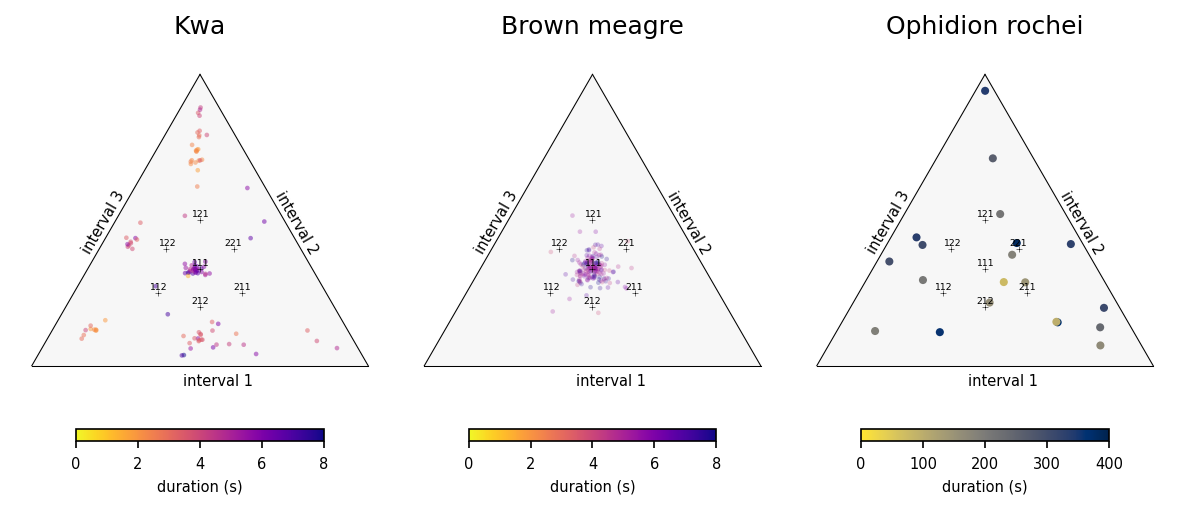

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3.5), tight_layout=True)

kws = dict(ratio_kws=dict(factors=[1,2]), plot_kws=dict(bottom_label_offset=-.2))

motifs, duration = normalize(ngram_motifs(kwa_intervals, length=3))
ternary_motif_plot(
    motifs, duration, 
    min_dur=0, max_dur=8,
    scatter_kws=dict(s=5, alpha=.5), 
    ax=axs[0], **kws)
axs[0].set_title('Kwa')

motifs, duration = normalize(ngram_motifs(bm_intervals, length=3))
ternary_motif_plot(
    motifs, duration, 
    min_dur=0, max_dur=8,
    scatter_kws=dict(s=5, alpha=.25), 
    ax=axs[1], **kws)
axs[1].set_title('Brown meagre')


motifs, duration = normalize(ngram_motifs(or_intervals, length=3))
ternary_motif_plot(
    motifs, duration, 
    min_dur=0, max_dur=400,
    cmap='cividis_r',
    scatter_kws=dict(s=15, alpha=1), 
    
    ax=axs[2], **kws)
axs[2].set_title('Ophidion rochei')

plt.savefig('figures/burchardt2021/burchardt2021-three-fish-species.pdf')
plt.savefig('figures/burchardt2021/burchardt2021-three-fish-species.png', dpi=150)